In [1]:
from fastai.imports import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

In [2]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd

In [53]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pd.options.mode.chained_assignment = None

In [5]:
df = pd.read_csv("./heart.csv")

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [8]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

In [10]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,male,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,female,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,male,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,male,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,male,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'

In [12]:
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'

In [13]:
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'

In [15]:
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

In [16]:
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

In [17]:
df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [18]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
5,57,male,0,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,upsloping,0,normal,1
6,56,female,typical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,upsloping,0,fixed defect,1
7,44,male,typical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,flat,0,reversable defect,1
8,52,male,atypical angina,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,flat,0,reversable defect,1
9,57,male,atypical angina,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,flat,0,fixed defect,1


In [19]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [20]:
def missing_data_ratio(df1):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    return missing_data

In [23]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    import imp

In [24]:
import pandas_profiling

In [25]:
profile = pandas_profiling.ProfileReport(df)

In [26]:
missing_data_ratio(df)

,Missing Ratio


In [27]:
profile

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [28]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [29]:
df.chest_pain_type = df.chest_pain_type.astype("category")
df.exercise_induced_angina = df.exercise_induced_angina.astype("category")
df.fasting_blood_sugar = df.fasting_blood_sugar.astype("category")
df.rest_ecg = df.rest_ecg.astype("category")
df.sex = df.sex.astype("category")
df.st_slope = df.st_slope.astype("category")
df.thalassemia = df.thalassemia.astype("category")

In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [36]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
        if not ignore_flds: ignore_flds=[]
        if not skip_flds: skip_flds=[]
        if subset: df = get_sample(df,subset)
        else: df = df.copy()
        ignored_flds = df.loc[:, ignore_flds]
        df.drop(ignore_flds, axis=1, inplace=True)
        if preproc_fn: preproc_fn(df)
        if y_fld is None: y = None
        else:
            if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
            y = df[y_fld].values
            skip_flds += [y_fld]
            df.drop(skip_flds, axis=1, inplace=True)

        if na_dict is None: na_dict = {}
        else: na_dict = na_dict.copy()
        na_dict_initial = na_dict.copy()
        for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
        if len(na_dict_initial.keys()) > 0:
            df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
        if do_scale: mapper = scale_vars(df, mapper)
        for n,c in df.items(): numericalize(df, c, n, max_n_cat)
        df = pd.get_dummies(df, dummy_na=True)
        df = pd.concat([ignored_flds, df], axis=1)
        res = [df, y, na_dict]
        if do_scale: res = res + [mapper]
        return res

In [33]:
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1

In [38]:
df_p.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


In [37]:
df_p,y,_=proc_df(df,"target")

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,30),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }

In [41]:
m = RandomForestClassifier()

In [42]:
m_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = m, scoring = "accuracy", 
                                        verbose = 0, n_iter = 100, cv = 5)

In [43]:

%time m_r.fit(df, y)

C:\Users\noble\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 17.7 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'max_depth': [4, 6, 8, 10], 'n_estimators': range(1, 30), 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_split': [2, 3, 10, 20], 'min_samples_leaf': [1, 3, 10, 18], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [44]:
m_r.best_score_

1.0

In [45]:
m_r.best_params_

{'n_estimators': 29,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [46]:
rf_bp = m_r.best_params_

In [47]:
rf_classifier=RandomForestClassifier(n_estimators=rf_bp["n_estimators"],
                                     min_samples_split=rf_bp['min_samples_split'],
                                     min_samples_leaf=rf_bp['min_samples_leaf'],
                                     max_features=rf_bp['max_features'],
                                     max_depth=rf_bp['max_depth'],
                                     bootstrap=rf_bp['bootstrap'])

In [48]:
rf_classifier.fit(df_p,y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=29, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [50]:
fi = rf_feat_importance(rf_classifier,df_p)

In [51]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

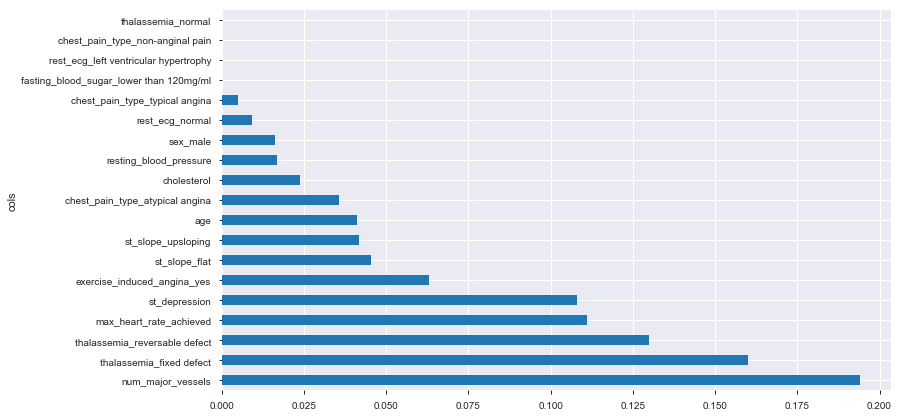

In [54]:
plot_fi(fi)

In [55]:
import lightgbm as lgbm

In [56]:
lgbm_model = lgbm.LGBMClassifier()

In [57]:
lgbm_params = {
    "n_estimators":[10,100,1000,2000],
    'boosting_type': ['dart','gbdt'],          
    'learning_rate': [0.05,0.1,0.2],       
    'min_split_gain': [0.0,0.1,0.5,0.7],     
    'min_child_weight': [0.001,0.003,0.01],     
    'num_leaves': [10,21,41,61],            
    'min_child_samples': [10,20,30,60,100]
              }

In [58]:
lgbm_model = lgbm.LGBMClassifier()

In [59]:
lgbm_c = RandomizedSearchCV(param_distributions=lgbm_params, 
                                    estimator = lgbm_model, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 4)

In [60]:
lgbm_c.fit(df_p,y)

C:\Users\noble\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [10, 100, 1000, 2000], 'boosting_type': ['dart', 'gbdt'], 'learning_rate': [0.05, 0.1, 0.2], 'min_split_gain': [0.0, 0.1, 0.5, 0.7], 'min_child_weight': [0.001, 0.003, 0.01], 'num_leaves': [10, 21, 41, 61], 'min_child_samples': [10, 20, 30, 60, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [61]:
lgbm_bp =lgbm_c.best_params_

In [62]:
lgbm_model = lgbm.LGBMClassifier(num_leaves=lgbm_bp["num_leaves"],
                                 n_estimators=lgbm_bp["n_estimators"],
                                 min_split_gain=lgbm_bp["min_split_gain"],
                                 min_child_weight=lgbm_bp["min_child_weight"],
                                 min_child_samples=lgbm_bp["min_child_samples"],
                                 learning_rate=lgbm_bp["learning_rate"],
                                 boosting_type=lgbm_bp["boosting_type"])


In [63]:
lgbm_model.fit(df_p,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.05, max_depth=-1,
        min_child_samples=30, min_child_weight=0.003, min_split_gain=0.5,
        n_estimators=100, n_jobs=-1, num_leaves=41, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
def feature_imp(df,model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

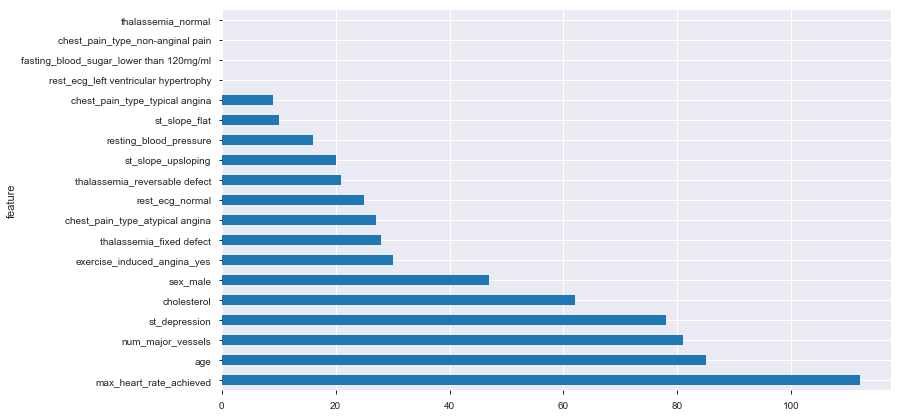

In [65]:
feature_imp(df_p,lgbm_model).plot('feature', 'importance', 'barh', figsize=(12,7), legend=False)

In [66]:
import xgboost as xgb

In [67]:
xgb_classifier = xgb.XGBClassifier()

In [68]:
gbm_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [69]:
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = xgb_classifier, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 4)

In [70]:
xgb_random.fit(df_p,y)

C:\Users\noble\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': range(1, 20), 'max_depth': range(1, 10), 'learning_rate': [0.1, 0.4, 0.45, 0.5, 0.55, 0.6], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1], 'booster': ['gbtree'], 'min_child_weight': [0.001, 0.003, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [71]:
xgb_bp = xgb_random.best_params_

In [72]:
xgb_model=xgb.XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                            min_child_weight=xgb_bp["min_child_weight"],
                            max_depth=xgb_bp["max_depth"],
                            learning_rate=xgb_bp["learning_rate"],
                            colsample_bytree=xgb_bp["colsample_bytree"],
                            booster=xgb_bp["booster"])

In [73]:
xgb_model.fit(df_p,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.45, max_delta_step=0,
       max_depth=3, min_child_weight=0.01, missing=None, n_estimators=16,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

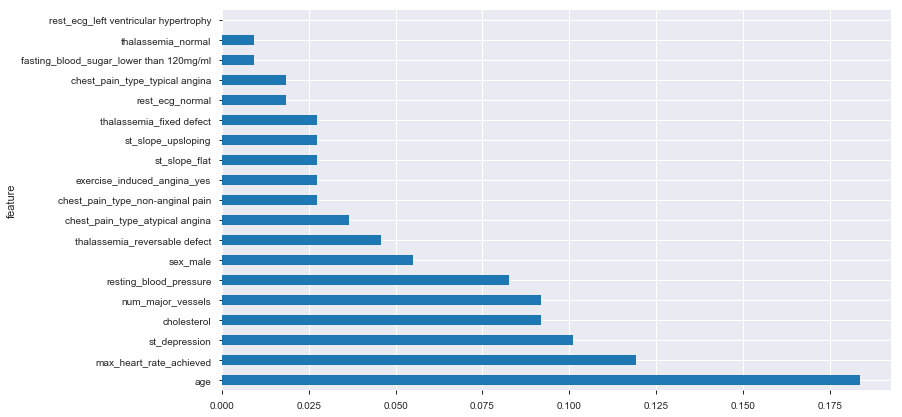

In [74]:
feature_imp(df_p,xgb_model).plot('feature', 'importance', 'barh', figsize=(12,7), legend=False)

In [75]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [76]:
rf_fm = rf_feat_importance(rf_classifier,df_p)
lgbm_fm = feature_imp(df_p,lgbm_model)
xgb_fm = feature_imp(df_p,xgb_model)

In [77]:
multi_table([rf_fm,lgbm_fm,xgb_fm])

,cols,imp
5,num_major_vessels,0.193927
16,thalassemia_fixed defect,0.159891
18,thalassemia_reversable defect,0.129825
3,max_heart_rate_achieved,0.110945
4,st_depression,0.108039
13,exercise_induced_angina_yes,0.062888
14,st_slope_flat,0.045382
15,st_slope_upsloping,0.041763
0,age,0.041081
7,chest_pain_type_atypical angina,0.035493


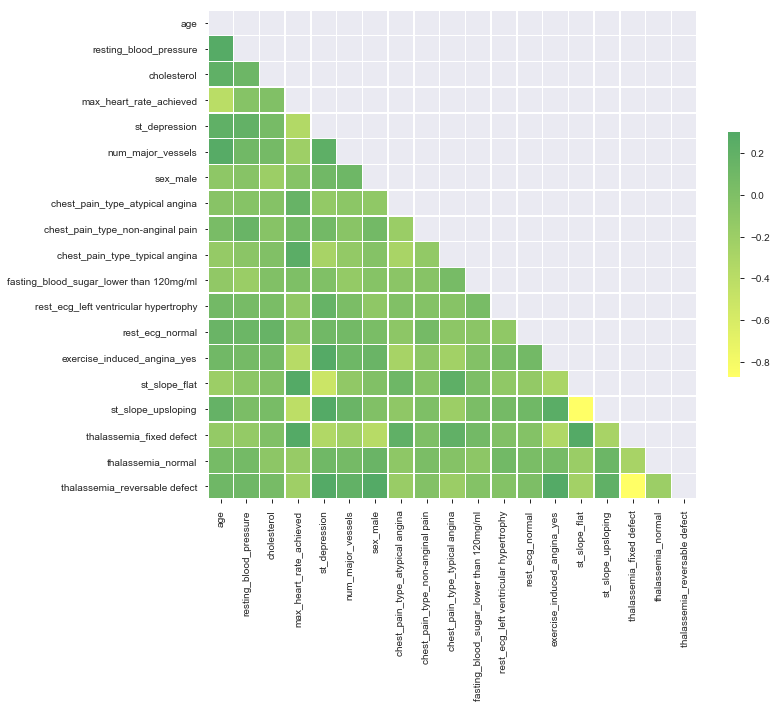

In [78]:
import seaborn as sns
corr = df_p.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [79]:
from scipy.cluster import hierarchy as hc

In [80]:
def hierarchy_tree(df):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-df.corr())
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
    plt.show()

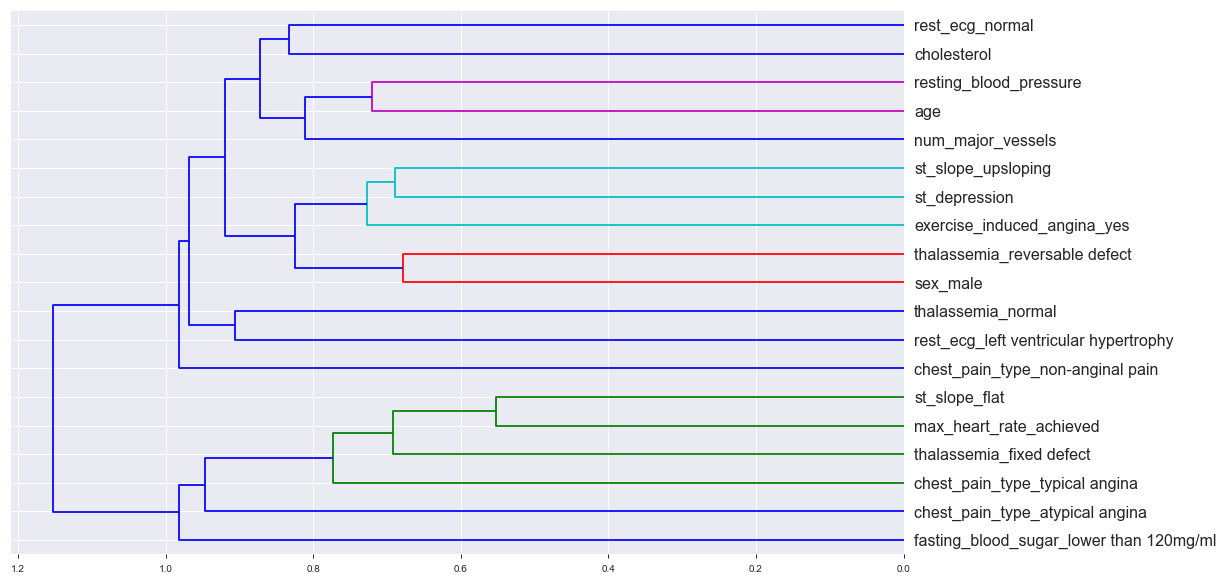

In [81]:
hierarchy_tree(df_p)

In [82]:
df_p["target"] = y  

In [83]:
df_p.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'target'],
      dtype='object')

In [84]:
max_heart_rate_achieved = pd.cut(df_p.max_heart_rate_achieved,4,labels=["71-104","105-137","138-170","171-202"])

In [85]:
df_p.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'target'],
      dtype='object')

In [86]:
cross1=pd.crosstab([df_p.st_slope_flat[df_p.st_slope_flat==1],df_p.target],max_heart_rate_achieved).style.background_gradient(cmap='summer_r')
cross1


In [87]:
cross1=pd.crosstab([df_p.st_slope_flat[df_p.st_slope_flat==1],df_p["thalassemia_fixed defect"][df_p["thalassemia_fixed defect"]==1],
                    df_p.target],max_heart_rate_achieved).style.background_gradient(cmap='summer_r')
cross1


In [88]:
cross1=pd.crosstab([df_p.st_slope_flat[df_p.st_slope_flat==1],df_p["thalassemia_fixed defect"][df_p["thalassemia_fixed defect"]==1],df_p["chest_pain_type_typical angina"][df_p["chest_pain_type_typical angina"]==1],
                    df_p.target],max_heart_rate_achieved).style.background_gradient(cmap='summer_r')
cross1